In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest

# Random dataset with 2 features 'x1' , 'x2'


In [ ]:
# rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [3]:
X_train.shape , X_outliers.shape

((2000, 2), (50, 2))

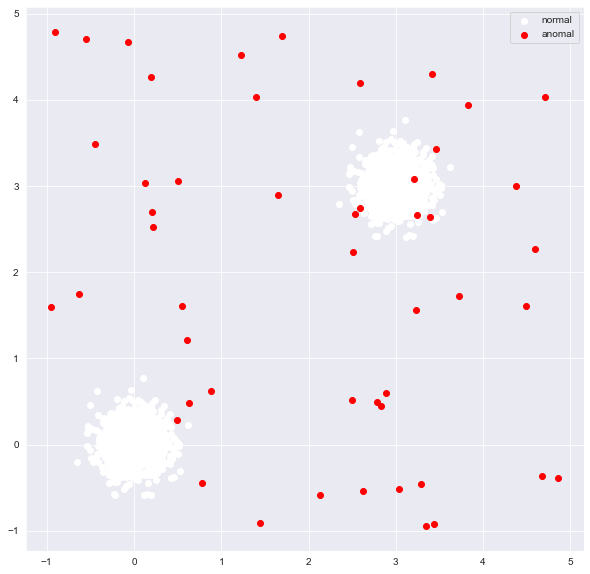

In [4]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(X_train['x1'],X_train['x2'],c='white',label='normal')
ax.scatter(X_outliers['x1'],X_outliers['x2'],c='red',label='anomal')
ax.legend()

In [5]:
clf = IsolationForest()
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [14]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

# assign 하면 쉽게 column 추가 가능

In [16]:
X_outliers = X_outliers.assign(y = y_pred_outliers)

In [22]:
X_outliers.loc[X_outliers.y==-1 , ['x1']
               
               

,x1
0,2.621823
1,-0.546498
2,0.783745
3,2.594268
4,2.891029
5,-0.909336
6,0.505358
7,3.239779
8,0.877444
9,2.586010


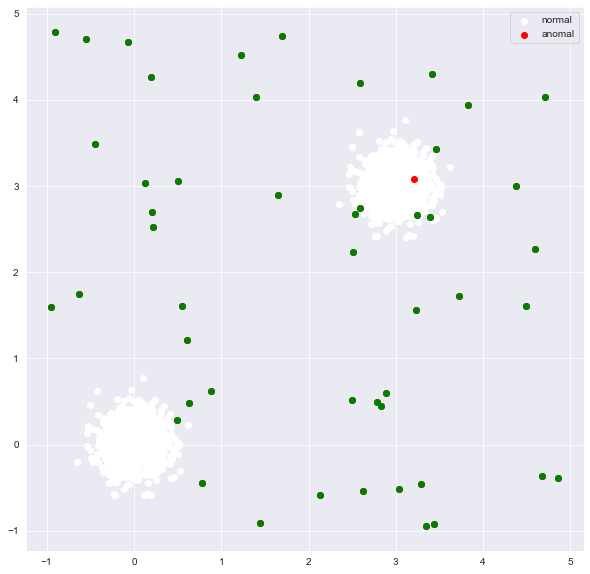

In [29]:

fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(X_train['x1'],X_train['x2'],c='white',label='normal')
ax.scatter(X_outliers['x1'],X_outliers['x2'],c='red',label='anomal')
ax.scatter(X_outliers.loc[X_outliers.y==-1 , ['x1']] , X_outliers.loc[X_outliers.y==-1 , ['x2']] , c='Green')
ax.legend()
